In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
chocolura = pd.read_csv('inputs/chocolura.csv')
print(chocolura.shape)
print(chocolura.dtypes)
chocolura.head()

(24, 2)
mes       object
vendas     int64
dtype: object


,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [58]:
chocolura.set_index('mes',inplace=True)
chocolura.index=pd.to_datetime(chocolura.index)
chocolura.head()

,vendas
mes,
2017-01-01,210
2017-02-01,185
2017-03-01,209
2017-04-01,280
2017-05-01,211


<AxesSubplot:xlabel='mes'>

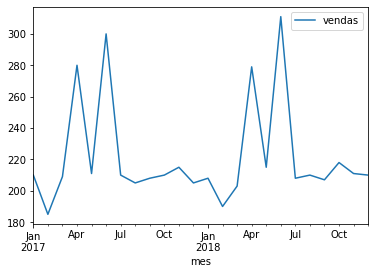

In [59]:
chocolura.plot()

In [60]:
resultado = seasonal_decompose(chocolura['vendas'], period=2)

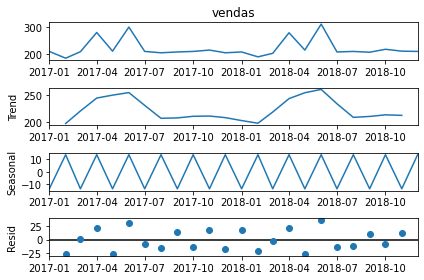

In [61]:
ax = resultado.plot()

In [62]:
observacao, tendencia, sazonalidade, ruido = resultado.observed, resultado.trend, resultado.seasonal, resultado.resid

In [63]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

In [64]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
mes,,,,
2017-01-01,210.0,NaN,-13.386364,NaN
2017-02-01,185.0,197.25,13.386364,-25.636364
2017-03-01,209.0,220.75,-13.386364,1.636364
2017-04-01,280.0,245.00,13.386364,21.613636
2017-05-01,211.0,250.50,-13.386364,-26.113636


In [65]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

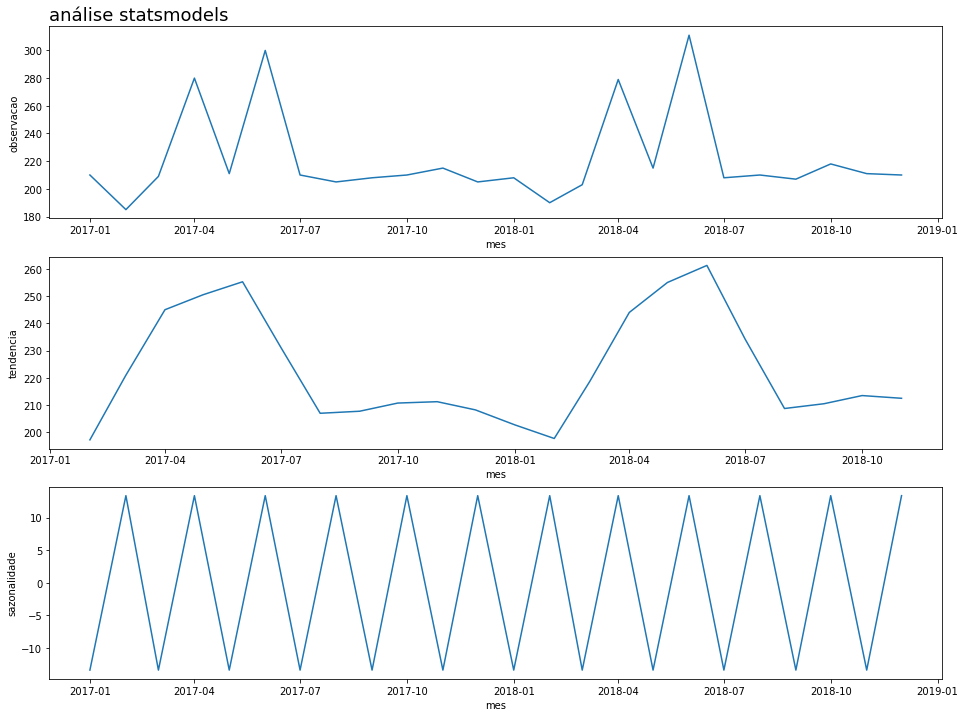

In [66]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'análise statsmodels')